# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

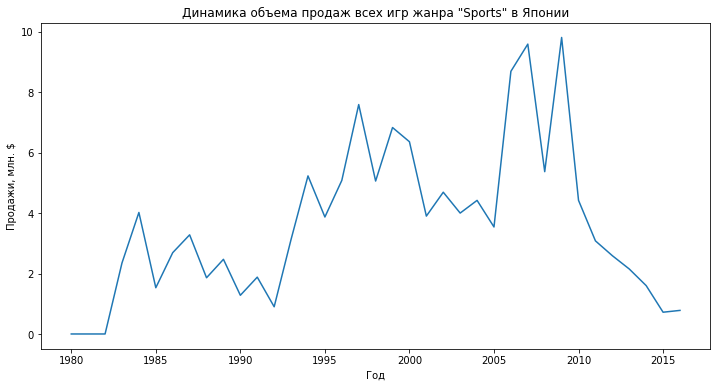

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
serSports = df[df['Genre']=='Sports'].groupby('Year').sum()
ax.plot(serSports.index, serSports['JP_Sales'])
ax.set_title('Динамика объема продаж всех игр жанра "Sports" в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн. $')
plt.show();

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

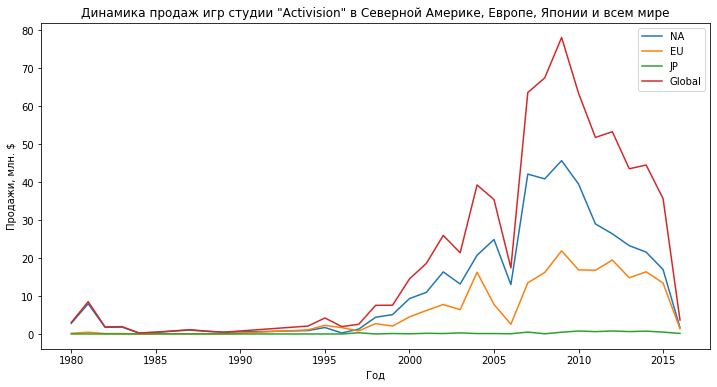

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
serActivision = df[df['Publisher']=='Activision'].groupby('Year').sum()
ax.plot(serActivision.index,serActivision['NA_Sales'], label='NA')
ax.plot(serActivision.index,serActivision['EU_Sales'], label='EU')
ax.plot(serActivision.index,serActivision['JP_Sales'], label='JP')
ax.plot(serActivision.index,serActivision['Global_Sales'], label='Global')
ax.set_title('Динамика продаж игр студии "Activision" в Северной Америке, Европе, Японии и всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн. $')
ax.legend()
plt.show();

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

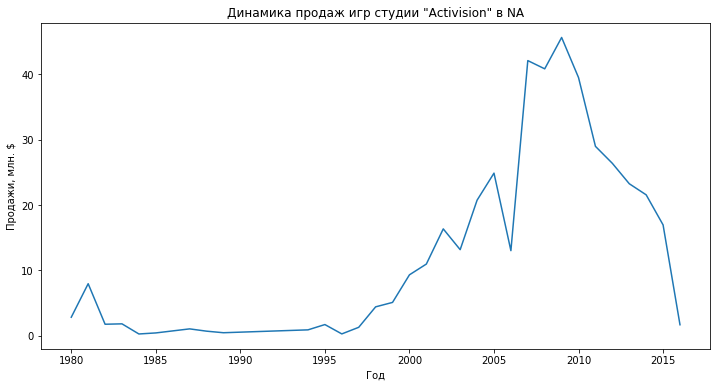

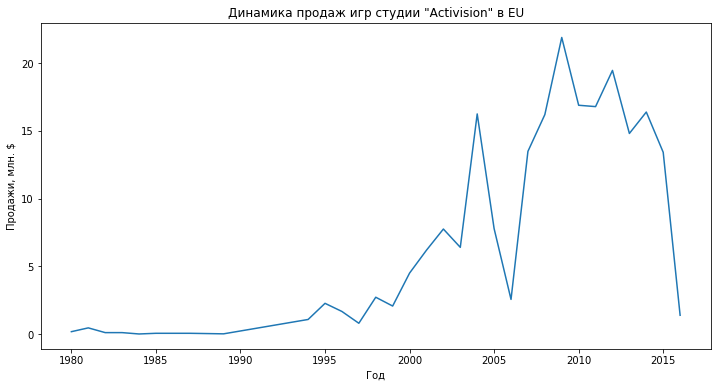

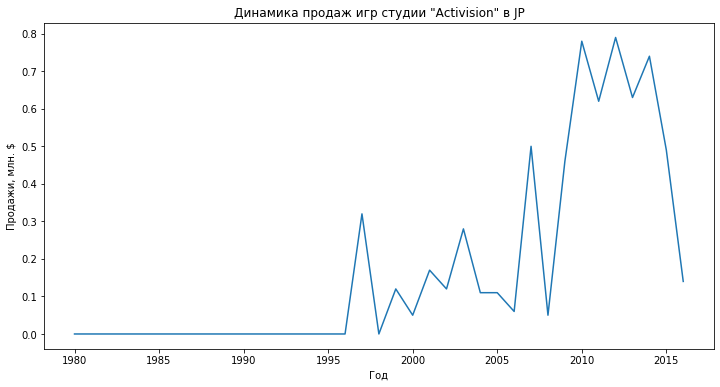

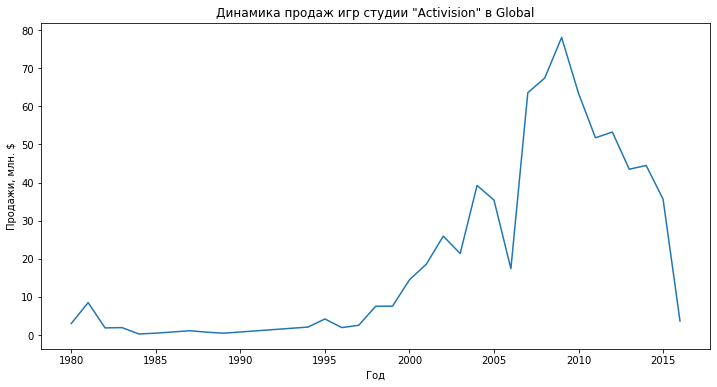

In [36]:
serActivision = df[df['Publisher']=='Activision'].groupby('Year').sum()
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(serActivision.index,serActivision[region], label=region[:region.find('_')])
    ax.set_title('Динамика продаж игр студии "Activision" в ' + region[:region.find('_')])
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, млн. $')
plt.show();

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

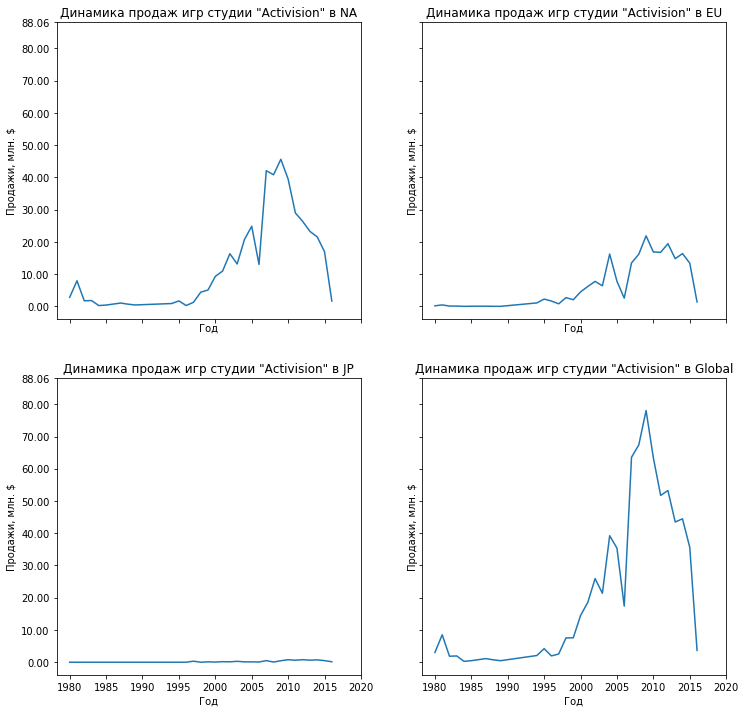

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharex=True, sharey=True) 
serActivision = df[df['Publisher']=='Activision'].groupby('Year').sum()
max_y = 0
for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']):
    ax = axs[i//2][i%2]
    ax.plot(serActivision.index,serActivision[region], label=region[:region.find('_')])
    ax.set_title('Динамика продаж игр студии "Activision" в ' + region[:region.find('_')])
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, млн. $')
    max_y = max(max_y, serActivision[region].max())
for row in axs:
    for axe in row:
        axe.set_yticks(list(np.arange(0, max_y+10, 10))+[max_y+10])
        axe.set_xticks(list(np.arange(serActivision.index.min(), serActivision.index.max()+5, 5)))
plt.show();

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

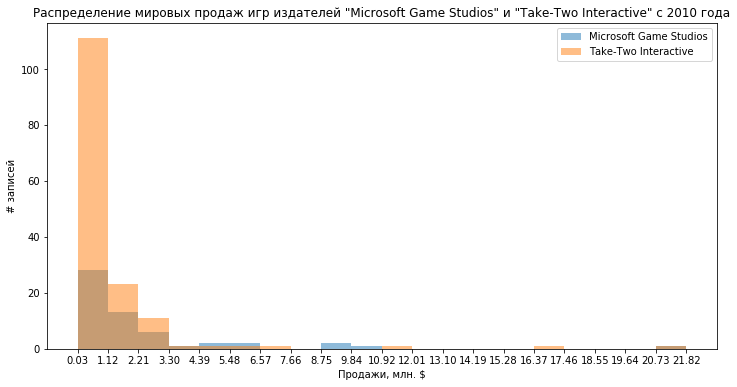

In [64]:
fig, ax = plt.subplots(figsize=(12, 6))
serMicrosoft = df[(df['Year']>=2010) & (df['Publisher']=='Microsoft Game Studios')]['Global_Sales']
serTakeTwo = df[(df['Year']>=2010) & (df['Publisher']=='Take-Two Interactive')]['Global_Sales']
_, bins, _ = ax.hist(serMicrosoft, label='Microsoft Game Studios', alpha=0.5, bins=20)
ax.hist(serTakeTwo, label='Take-Two Interactive', alpha=0.5, bins=bins)
ax.set_title('Распределение мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" c 2010 года')
ax.set_xlabel('Продажи, млн. $')
ax.set_ylabel('# записей')
ax.set_xticks(bins)
ax.legend()
plt.show();

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

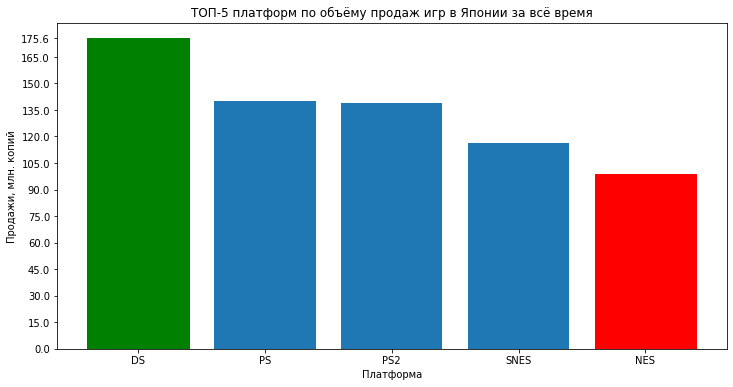

In [92]:
TOP=5 #Меняя один параметр можем выбрать любое количество
serie = df.groupby('Platform').sum().sort_values('JP_Sales', ascending=False).head(TOP)
fig, ax = plt.subplots(figsize=(12, 6))
barCont = ax.bar(serie.index, serie['JP_Sales'])
barCont.patches[0].set_color('green') #Т.к. используется сортировка по убыванию, то первый столбец всегда самый высокий
barCont.patches[TOP-1].set_color('red') #А последний всегда самый низкий. 
ax.set_title(f'ТОП-{TOP} платформ по объёму продаж игр в Японии за всё время')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн. копий')
y_range = list(np.arange(0, serie['JP_Sales'].max()+1,15))
y_range.append(serie['JP_Sales'].max())
ax.set_yticks(y_range);